# Robocafe opening in Moscow

There was an idea to open a small cafe in Moscow. It is original - guests should be served by robots. The project is promising, but expensive. It is necessary to prepare a market study for potential investors based on open data on public catering establishments in Moscow.

**Work Plan**

- **Step 1. Open data files, study general information and prepare data**

    The path to the file:
    - /datasets/rest_data.csv
    
    You need to make sure that the data type in each column is correct and that there are no missing values or duplicates. Process them if necessary.
     
    
- **Step 2. Let's analyze the data**

    - We investigate the ratio of types of public catering facilities by quantity. Let's build a graph.;
    - We are researching the ratio of chain and non-chain establishments by number. Let's build a graph;
    - Let's determine for what type of public catering object network distribution is typical;
    - Find out what is typical for network establishments: many establishments with a small number of seats in each or few establishments with a large number of seats;
    - For each type of catering facility, we describe the average number of seats. Let's determine which type provides the largest number of seats on average. Let's build graphs;
    - Select in a separate column information about the street from the `address` column;
    - Let's build a graph of the top 10 streets by the number of catering facilities. Let's use external information and answer the question - in what districts of Moscow are these streets located?
    - Find the number of streets with one catering facility. Let's use external information and answer the question - in what districts of Moscow are these streets located?
    
    We will draw a general conclusion and give recommendations on the type of institution, the number of seats, as well as the area of location. Let us comment on the possibility of network development.
    
    
- **Step 3. Presentation preparation**

    We will prepare a presentation of the study for investors.
         
      
- **Step 4. Write a general conclusion**


- **Description of data**

   File `/datasets/rest_data.csv` (open data about catering establishments in Moscow):

    - `id` — object identifier
    - `object_name` — name of the catering facility
    - `chain` - chain restaurant
    - `object_type` — type of catering object
    - `address` — address
    - `number` — number of seats

## Loading data and preparing it for analysis
Let's load the data into a variable. Optimizing data for analysis. Make sure the data type in each column is correct. The path to the file:

  - /datasets/rest_data.csv.

In [1]:
# !pip install dadata

### Data overview

Let's open the table and see general information about it.

In [2]:
# import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import BytesIO
import requests
pd.set_option('chained_assignment', None)

In [3]:
# setting the display of dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# reading a data file and saving to a variable
pth1 = '/datasets/rest_data.csv'
pth2 = 'C:/Users/tatar/downloads/rest_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
# print the first 5 rows of the table
display(df.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
</div>

In [5]:
# getting general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Let's check if there are duplicate rows in the original dataframe. To do this, let's look at repetitions for all columns except `id`.

In [6]:
# counting duplicate rows in a table
df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'],
              keep=False).sum()

144

**Conclusions**

* Need to replace `number` column name with `number_of_seats` for correctness;
* There are no missing values;
* Data types are correct;
* There are duplicate lines, you need to process them.

### Data preprocessing

Let's replace the column name `number` with `number_of_seats` for correctness.

In [7]:
# replacing column name `number`
df = df.rename(columns={'number':'number_of_seats'})

# check
df.head()

,id,object_name,chain,object_type,address,number_of_seats
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
</div>

Now we can start looking for possible anomalies in the data. First, let's see what types of public institutions are present in the original dataframe.

In [8]:
# output of types of catering establishments by number
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * предприятие быстрого обслуживания - fast food business
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * магазин (отдел кулинарии) - store (culinary department)
</div>

For a better display on the graphs, we will replace the names of the types `предприятие быстрого обслуживания` (fast food business) with `фаст-фуд` (fast food) and `магазин (отдел кулинарии)` (store (culinary department)) with `кулинария` (culinary).

In [9]:
# replacing types of catering establishments with more "readable" ones
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд', regex=True)
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария', regex=True)

# check
df['object_type'].value_counts()

кафе          6099
столовая      2587
ресторан      2285
фаст-фуд      1923
бар            856
буфет          585
кафетерий      398
закусочная     360
кулинария      273
Name: object_type, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

Let's look at belonging to networks.

In [10]:
# conclusion of belonging to a public catering network by quantity
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'chain' column shows belonging to the public catering network in Russian
    
    * нет - no
    * да - yes
</div>

For a better display on the graphs, we will change the belonging to networks from `да` (yes) to `сетевое` (network) and from `нет` (no) to `несетевое` (non-network).

In [11]:
# replacement of belonging to the catering network with a more "readable" one
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})

# check
df['chain'].value_counts()

несетевое    12398
сетевое       2968
Name: chain, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'chain' column shows belonging to the public catering network in Russian
    
    * несетевое - non-network
    * сетевое - network
</div>

Let's move on to processing duplicate lines, display them on the screen and see what kind of repetitions there are.

In [12]:
# output lines with repeated information
df[df.duplicated(subset=['object_name', 'chain',
                         'object_type', 'address', 'number_of_seats'], keep=False)]

,id,object_name,chain,object_type,address,number_of_seats
2374,28603,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,несетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,несетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2869,25031,LALTRO BOSCO,несетевое,ресторан,"город Москва, улица Петровка, дом 10",145
3480,20913,Буфет Мади,несетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,20914,Буфет Мади,несетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40
4430,23741,СТОЛОВАЯ ГБОУ города Москвы № 384,несетевое,буфет,"город Москва, Беловежская улица, дом 67",100
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,несетевое,буфет,"город Москва, Беловежская улица, дом 67",100
4536,23381,Столовая «Комбинат питания КОСМОС»,несетевое,столовая,"город Москва, Новозаводская улица, дом 12/11",15
4537,23391,Столовая «Комбинат питания КОСМОС»,несетевое,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5058,20019,LIFT,несетевое,кафе,"город Москва, Багратионовский проезд, дом 7, корпус 1",20


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
</div>

Now you can remove duplicates.

In [13]:
# removing duplicates
df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address',
                           'number_of_seats'], inplace=True)

Now let's check the network establishments by name.

In [14]:
# output of unique names of network catering establishments
df.loc[df['chain'] == 'сетевое', 'object_name'].unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
</div>

In [15]:
print('Number of catering networks:', len(df.loc[df['chain'] == 'сетевое', 
                                                            'object_name'].unique()))

Number of catering networks: 724


We see a large number of duplicate names, in different spellings. To begin with, we will bring all the names to lowercase, this will somewhat reduce the number of duplicate names.

In [16]:
# converting object names to lowercase
df['object_name'] = df['object_name'].str.lower()

In [17]:
print('Number of catering networks:', len(df.loc[df['chain'] == 'сетевое', 
                                                            'object_name'].unique()))

Number of catering networks: 577


This partially solved the problem, but let's try to further reduce the number of duplicate names, at least in popular networks. To do this, we will create a list with some names of popular networks, then we will write a function that will change the name of the institution to the same type.

In [18]:
places_list = ['милти', 'макдоналдс', 'шоколадница', 'бургер кинг', 'теремок', "домино'с пицца",
               'крошка картошка', 'kfc', 'суши wok', 'папа джонс', 'додо пицца', 'subway', 'starbucks', 
               'му-му', 'кулинарная лавка братьев караваевых', 'мята lounge', 'costa coffee', 'кружка',
               'prime', 'дабл би', 'стардогs', 'космик', 'гудман', 'пронто', 'иль патио', 'ванвок', 
               'додо пицца', 'штолле', 'чайхона №1', 'андерсон', 'кофе хаус', 'тануки', 'торро гриль', 'магбургер',
               'coffeeshop', 'krispy creme', 'tutti frutti', 'upside down', 'азбука вкуса', 'алло пицца', 'moskalyan',
               'николай', 'бир хаус', 'в&в бургер', 'да пино', 'баскин роббинс', 'американ сити пицца', 'якитория',
               'маки-маки', 'старбакс', 'иль форно', 'урюк', 'вьеткафе', 'пицца хат', 'сушишоп', 'ваби-саби', 'данкин донатс',
               'менза', 'нияма', 'прайм', 'кофемания', 'волконский', 'хлеб насущный', 'суши тун', 'территория']

def name_equalizer(row):
    for name in places_list:
        if name in row['object_name']:
            return name
    return row['object_name']
            
df['object_name'] = df.apply(name_equalizer, axis=1)

In [19]:
print('Number of catering networks:', len(df.loc[df['chain'] == 'сетевое', 
                                                            'object_name'].unique()))

Number of catering networks: 350


**Conclusions**

During data preprocessing, we did the following:
* Replaced `number` column name with `number_of_seats`;
* Replaced the names of types of public establishments: from `предприятие быстрого обслуживания` (fast food business) to `фаст-фуд` (fast food) and from `магазин (отдел кулинарии)` (store (culinary department)) to `кулинария` (culinary)
* Changed the name of belonging to networks: from `да` (yes) to `сетевое` (network) and from `нет` (no) to `несетевое` (non-network);
* Processed duplicate lines;
* Processed duplicate names of chain food establishments.

## Data analysis

Let's analyze the data using different types of graphs.

### The ratio of types of public catering establishments by number

Let's form a pivot table with the ratio of catering types by quantity and build a bar chart with a pie chart.

In [20]:
# formation of a pivot table
rest_by_types = (
    df
    .pivot_table(index='object_type', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

rest_by_types['ratio'] = round(rest_by_types['number'] / rest_by_types['number'].sum(), 3)
rest_by_types

,number,ratio
object_type,,
кафе,6071,0.397
столовая,2584,0.169
ресторан,2282,0.149
фаст-фуд,1898,0.124
бар,855,0.056
буфет,577,0.038
кафетерий,395,0.026
закусочная,349,0.023
кулинария,273,0.018


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

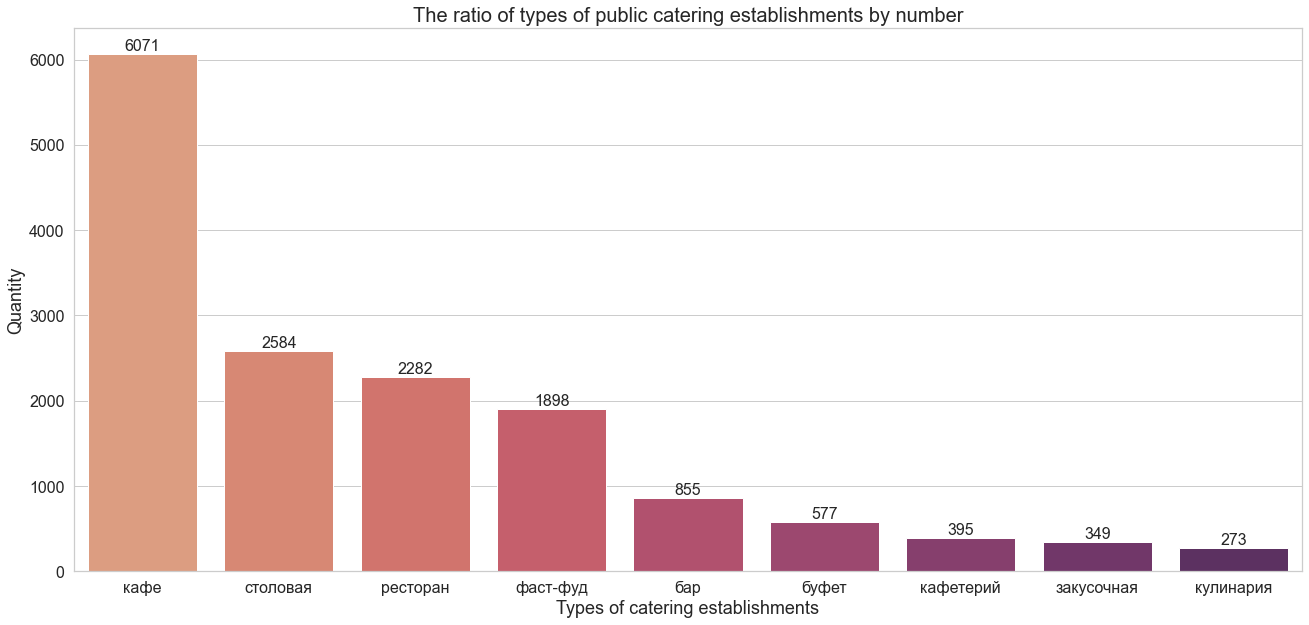

In [21]:
# building a bar chart
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x=rest_by_types.index, y='number', data=rest_by_types, palette='flare')
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')
plt.title('The ratio of types of public catering establishments by number', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Types of catering establishments', fontsize=18)
plt.ylabel('Quantity', fontsize=18)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

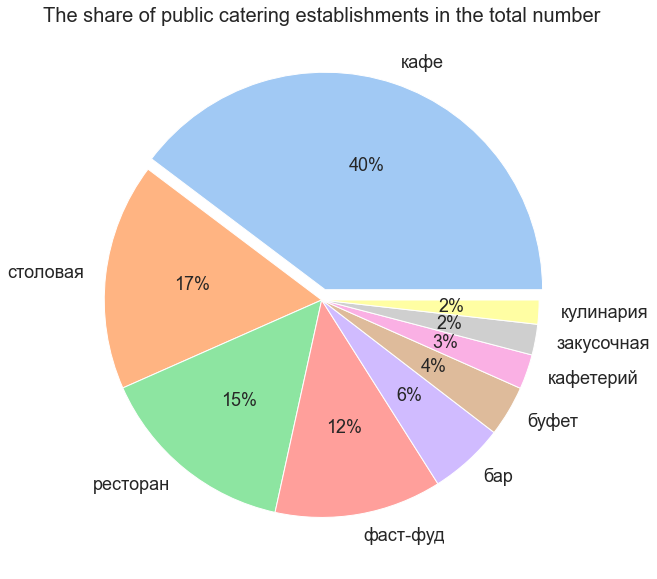

In [22]:
# building a pie chart
plt.figure(figsize=(22,10))
colors = sns.color_palette('pastel')
explode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(rest_by_types['number'], labels=rest_by_types.index, explode=explode, colors=colors, autopct='%.0f%%', 
        textprops={'fontsize': 18})
plt.title('The share of public catering establishments in the total number', fontsize=20)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

**Conclusions**

* Moscow has the most cafes (40% of the total);
* In second place are canteens (17% of the total);
* On the third - restaurants (15% of the total);
* Surprisingly, fast food ranks fourth in prevalence with 13% of the total.

### The ratio of network and non-network establishments by number

Let's form a pivot table with the ratio of network and non-network establishments by number and build a bar chart with a pie chart.

In [23]:
# formation of a pivot table
rest_by_chain = (
    df
    .pivot_table(index='chain', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

rest_by_chain['ratio'] = round(rest_by_chain['number'] / rest_by_chain['number'].sum(), 3)
rest_by_chain

,number,ratio
chain,,
несетевое,12320,0.806
сетевое,2964,0.194


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'chain' column shows belonging to the public catering network in Russian
    
    * несетевое - non-network
    * сетевое - network
</div>

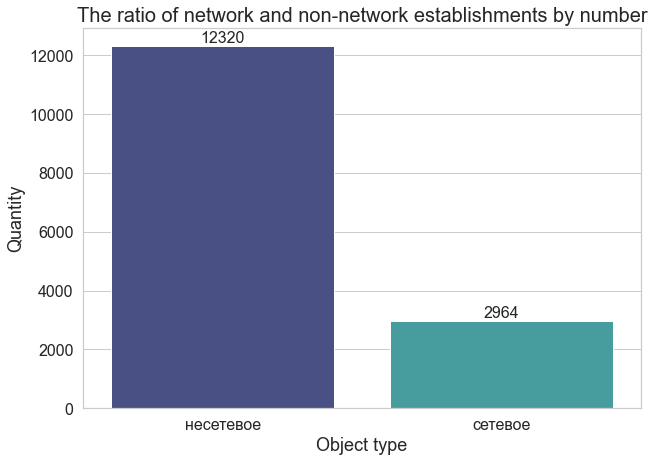

In [24]:
# building a bar chart
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,7))
plots = sns.barplot(x=rest_by_chain.index, y='number', data=rest_by_chain, palette='mako')
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')
plt.title('The ratio of network and non-network establishments by number', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Object type', fontsize=18)
plt.ylabel('Quantity', fontsize=18)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'chain' column shows belonging to the public catering network in Russian
    
    * несетевое - non-network
    * сетевое - network
</div>

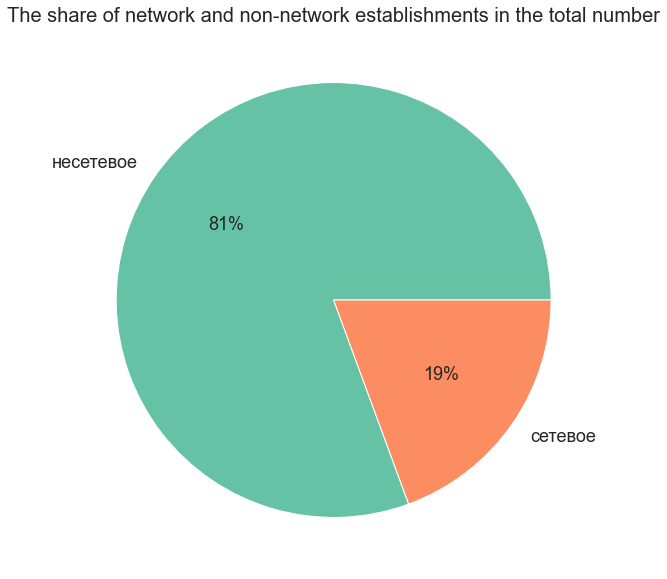

In [25]:
# building a pie chart
plt.figure(figsize=(22,10))
colors = sns.color_palette('Set2')
plt.pie(rest_by_chain['number'], labels=rest_by_chain.index, colors=colors, autopct='%.0f%%', textprops={'fontsize': 18})
plt.title('The share of network and non-network establishments in the total number', fontsize=20)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'chain' column shows belonging to the public catering network in Russian
    
    * несетевое - non-network
    * сетевое - network
</div>

**Conclusions**

Moscow has the most non-network establishments (81% of the total), only 19% of network establishments.

### Determining the types of public catering establishments for which network distribution is typical

Let's create a pivot table with the distribution of network and non-network establishments by object type and build a bar chart.

In [26]:
# formation of a pivot table
rest_by_types_x_chain = (
    df
    .pivot_table(index='object_type', values='id', columns='chain', aggfunc='count')
    .sort_values(by='сетевое', ascending=False)
)

rest_by_types_x_chain = rest_by_types_x_chain.reindex(columns=['сетевое', 'несетевое'])
rest_by_types_x_chain

chain,сетевое,несетевое
object_type,,
кафе,1396,4675
фаст-фуд,788,1110
ресторан,543,1739
кулинария,78,195
закусочная,56,293
кафетерий,52,343
бар,37,818
буфет,11,566
столовая,3,2581


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

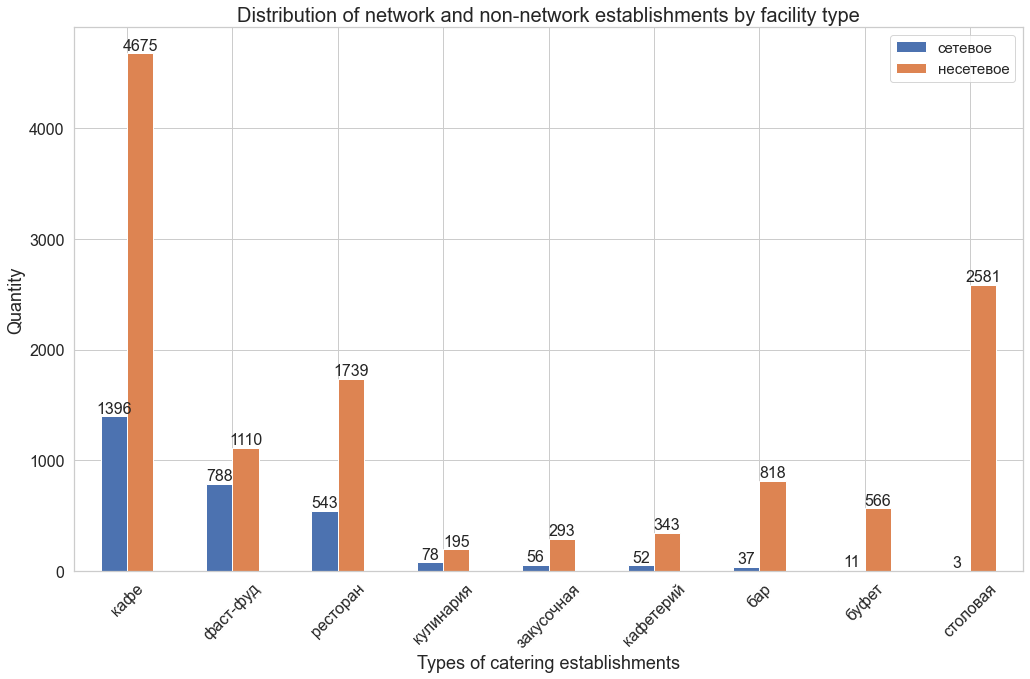

In [27]:
# building a bar chart
plt.figure(figsize=(17,10))
ax = plt.subplot(1,1,1)
plots = rest_by_types_x_chain.plot(kind='bar', ax=ax)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Distribution of network and non-network establishments by facility type', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Types of catering establishments', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Quantity', fontsize=18)
plt.legend(fontsize=15)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
    
    The 'chain' column shows belonging to the public catering network in Russian
    
    * несетевое - non-network
    * сетевое - network
</div>

Now let's see how the shares of network establishments are distributed in various types of catering establishments.

In [28]:
# formation of a pivot table
chain_rest_by_types = round((rest_by_types_x_chain['сетевое'] / 
                       (rest_by_types_x_chain['сетевое'] + rest_by_types_x_chain['несетевое'])), 4).reset_index()
   
chain_rest_by_types.columns = ['object_type', 'ratio']
chain_rest_by_types.sort_values(by='ratio', inplace=True, ascending=False)
chain_rest_by_types

,object_type,ratio
1,фаст-фуд,0.4152
3,кулинария,0.2857
2,ресторан,0.2379
0,кафе,0.2299
4,закусочная,0.1605
5,кафетерий,0.1316
6,бар,0.0433
7,буфет,0.0191
8,столовая,0.0012


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

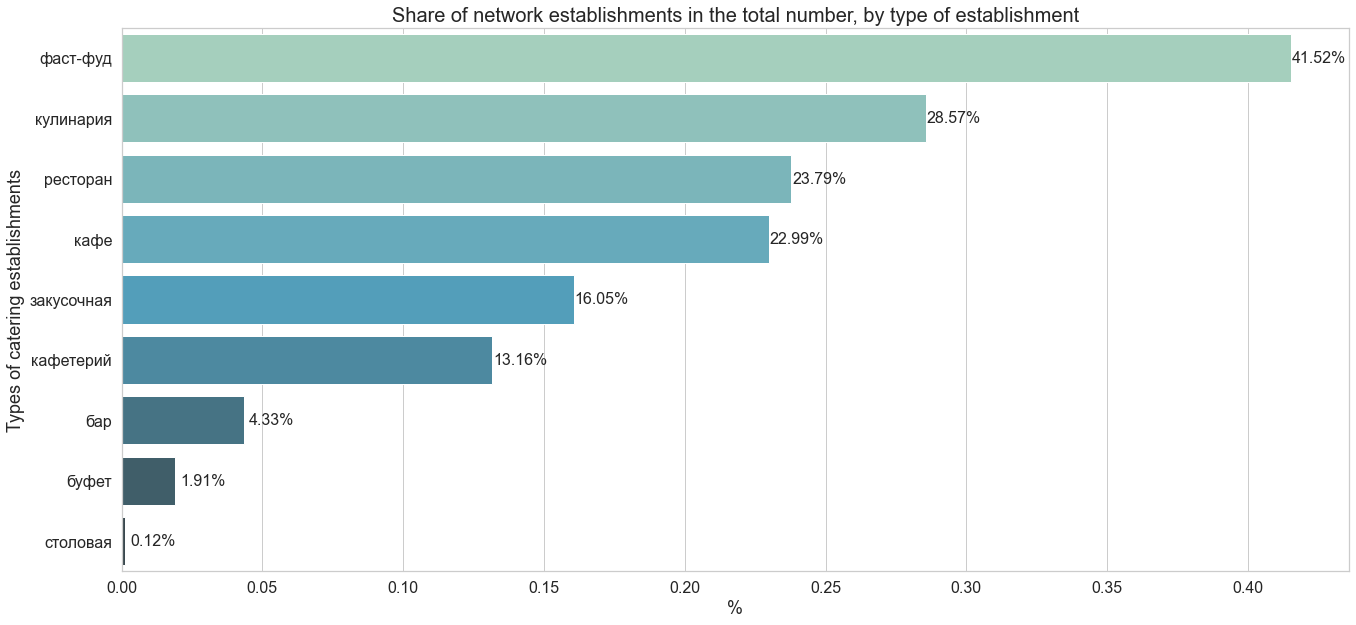

In [29]:
# building a bar chart
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x='ratio', y='object_type', data=chain_rest_by_types, palette='GnBu_d')
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2%'),
                   (bar.get_x() + bar.get_width(),
                   bar.get_y() + bar.get_height() / 2), ha='center', va='center',
                   size=16, xytext=(28, 0),
                   textcoords='offset points')
plt.title('Share of network establishments in the total number, by type of establishment', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('%', fontsize=18)
plt.ylabel('Types of catering establishments', fontsize=18)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

**Conclusions**

Network establishments are most common in:
* Fast food, 41% of the number of establishments (which is quite expected);
* Culinary, 29% of the number of establishments;
* Restaurants, 24% of the number of establishments.

Network establishments are least common in:
* Bars, 4% of the number of establishments;
* Buffets, 2% of the number of establishments;
* Canteens, ~1% of the number of establishments.

### Determining the number of seats in network establishments

Let's form an auxiliary table with information only on network establishments, look at general information about the distribution of the number of places and build a histogram with a violin diagram.

In [30]:
# auxiliary table formation
rest_data_chains_only = df.loc[df['chain'] == 'сетевое']
rest_data_chains_only.head()

,id,object_name,chain,object_type,address,number_of_seats
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,сетевое,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,сетевое,фаст-фуд,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,сетевое,ресторан,"город Москва, Большая Академическая улица, дом 65",160


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
</div>

In [31]:
# output of general information about the distribution of the number of seats
rest_data_chains_only['number_of_seats'].describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number_of_seats, dtype: float64

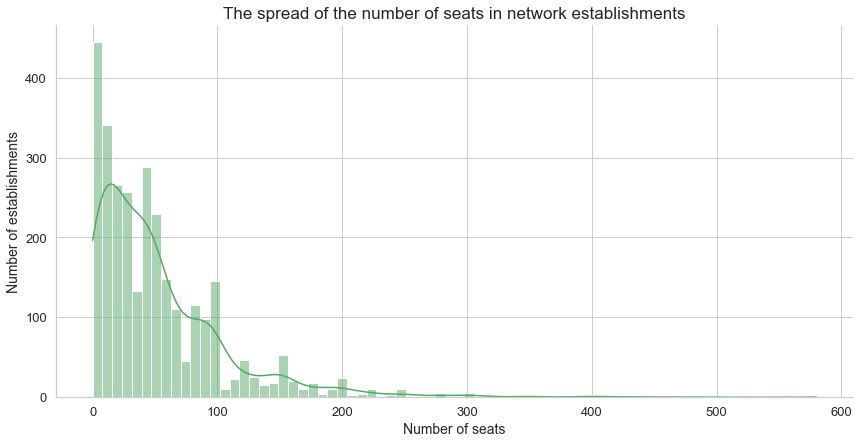

In [32]:
# building a histogram
sns.set_theme(style='whitegrid')
sns.displot(x='number_of_seats', data=rest_data_chains_only, kde = True, color='g', height=6, aspect=2.0,)
plt.title('The spread of the number of seats in network establishments', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Number of seats', fontsize=14)
plt.ylabel('Number of establishments', fontsize=14)
plt.show()

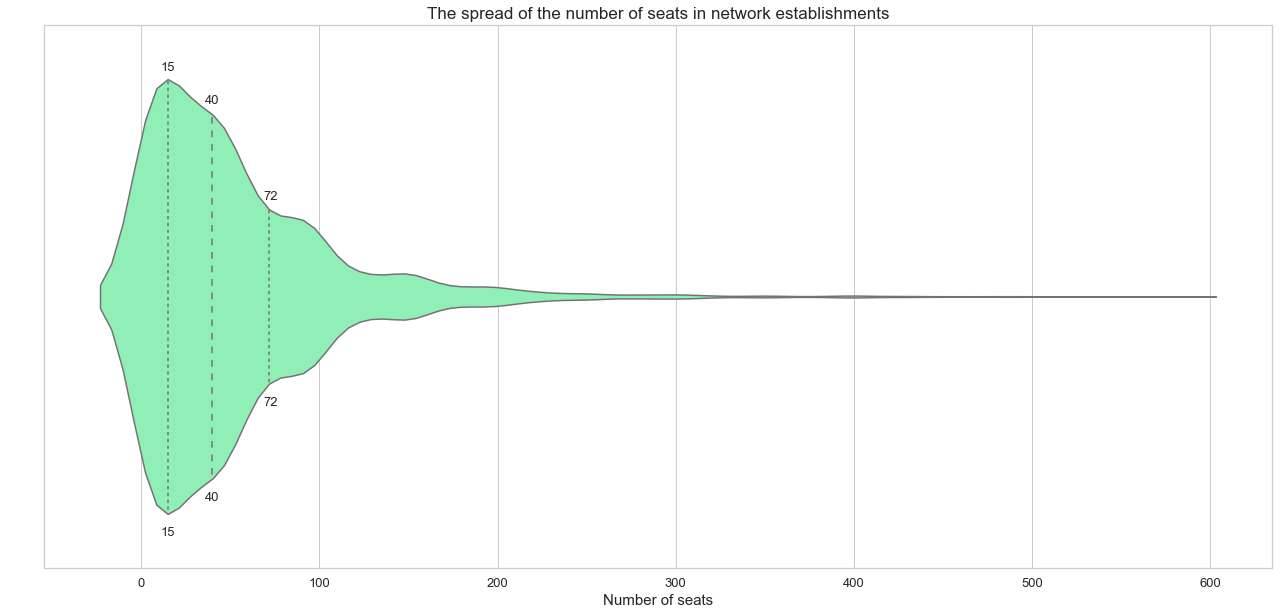

In [33]:
# constructing a violin diagram
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.violinplot(x='number_of_seats', data=rest_data_chains_only, palette='rainbow', inner='quartile')
# adding annotations to a chart
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 25)), 
               xy=(161, 80), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 25)), 
               xy=(161, 545), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 50)), 
               xy=(205, 115), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 50)), 
               xy=(205, 512), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 75)), 
               xy=(263, 210), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 75)), 
               xy=(263, 416), xycoords='figure points', fontsize=13)
plt.title('The spread of the number of seats in network establishments', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Number of seats', fontsize=15)
plt.show()

Let's find out how many places are included in 10% of network establishments.

In [34]:
print('10% of network establishments have from', 
      round(np.percentile(rest_data_chains_only['number_of_seats'], 90)), 'places or more.')

10% of network establishments have from 120 places or more.


At the next stage, we will find out the number of networks and the median value of seats in them. To do this, we will form a table grouping networks by name.

In [35]:
# auxiliary table formation
rest_by_chains = (
    rest_data_chains_only
    .pivot_table(index='object_name', aggfunc={'id': len})
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)
rest_by_chains.head(10)

,number
object_name,
kfc,188
шоколадница,185
макдоналдс,172
бургер кинг,159
теремок,111
домино'с пицца,99
крошка картошка,96
милти,81
суши wok,76


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
</div>

Now let's look at the distribution of the number of networks (having previously removed networks with one establishment, there are many of them due to different spellings of one name).

In [36]:
# output of general information about the distribution 
# of the number of establishments in the network
rest_by_chains.loc[rest_by_chains['number'] != 1, 'number'].describe()

count    192.000000
mean      14.614583
std       29.668984
min        2.000000
25%        2.000000
50%        4.000000
75%       10.000000
max      188.000000
Name: number, dtype: float64

It turns out an interesting picture. Networks can be divided into 4 groups:

* **small networks** with less than 2 establishments;
* **moderate networks** with the number of establishments from 2 to 4;
* **medium networks** with the number of establishments from 4 to 10;
* **large networks** with more than 10 establishments.

Let's group our `rest_by_chains` table by group names and display general information about the distribution of the number of places in them.

In [37]:
# write a function
def chain_group(chain): 
    if chain <= 2:
        return 'маленькая сеть'
    if chain <= 4:
        return 'небольшая сеть'
    if chain <= 10:
        return 'средняя сеть'
    return 'большая сеть'

# using a loop, add a column with the number of establishments in the network
for value in rest_data_chains_only['object_name'].unique():
    number = rest_data_chains_only.loc[rest_data_chains_only['object_name'] == value, 'id'].count()
    rest_data_chains_only.loc[rest_data_chains_only['object_name'] == value, 'number'] = number
    
# add a column to the table using the function
rest_data_chains_only['chain_category'] = rest_data_chains_only['number'].apply(chain_group)
rest_data_chains_only.head(10)

,id,object_name,chain,object_type,address,number_of_seats,number,chain_category
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,2.0,маленькая сеть
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,8.0,средняя сеть
13,22579,алло пицца,сетевое,кафе,"город Москва, улица Авиаторов, дом 14",32,16.0,большая сеть
16,144107,суши wok,сетевое,фаст-фуд,"город Москва, Азовская улица, дом 3",7,76.0,большая сеть
18,58565,тануки,сетевое,ресторан,"город Москва, Большая Академическая улица, дом 65",160,47.0,большая сеть
25,81554,домино'с пицца,сетевое,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24,99.0,большая сеть
30,24387,готика,сетевое,ресторан,"город Москва, Ангарская улица, дом 39",65,1.0,маленькая сеть
33,69243,суши wok,сетевое,кафе,"город Москва, проспект Андропова, дом 30",4,76.0,большая сеть
37,24968,му-му,сетевое,кафе,"город Москва, улица Арбат, дом 4, строение 1",125,32.0,большая сеть
38,127980,хлеб насущный,сетевое,кафе,"город Москва, улица Арбат, дом 6/2",20,33.0,большая сеть


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
    
    The 'chain_category' column shows the network category of catering establishments in Russian
    
    * маленькая сеть - small network
    * небольшая сеть - moderate network
    * средняя сеть - medium network
    * большая сеть - large network
</div>

In [38]:
# output of general information about the distribution of the number of seats
(
    rest_data_chains_only
    .loc[rest_data_chains_only['number'] != 1]
    .groupby('chain_category')['number_of_seats']
    .describe()
    .sort_values(by='count', ascending=False)
)

,count,mean,std,min,25%,50%,75%,max
chain_category,,,,,,,,
большая сеть,2208.0,50.014493,55.944433,0.0,14.00,38.0,65.25,580.0
средняя сеть,351.0,59.336182,59.547780,0.0,20.00,45.0,85.00,400.0
небольшая сеть,139.0,70.561151,64.119919,0.0,25.00,50.0,97.00,356.0
маленькая сеть,108.0,59.111111,55.827560,0.0,19.25,43.5,90.00,320.0


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'chain_category' column shows the network category of catering establishments in Russian
    
    * маленькая сеть - small network
    * небольшая сеть - moderate network
    * средняя сеть - medium network
    * большая сеть - large network
</div>

Let's build a boxplot chart.

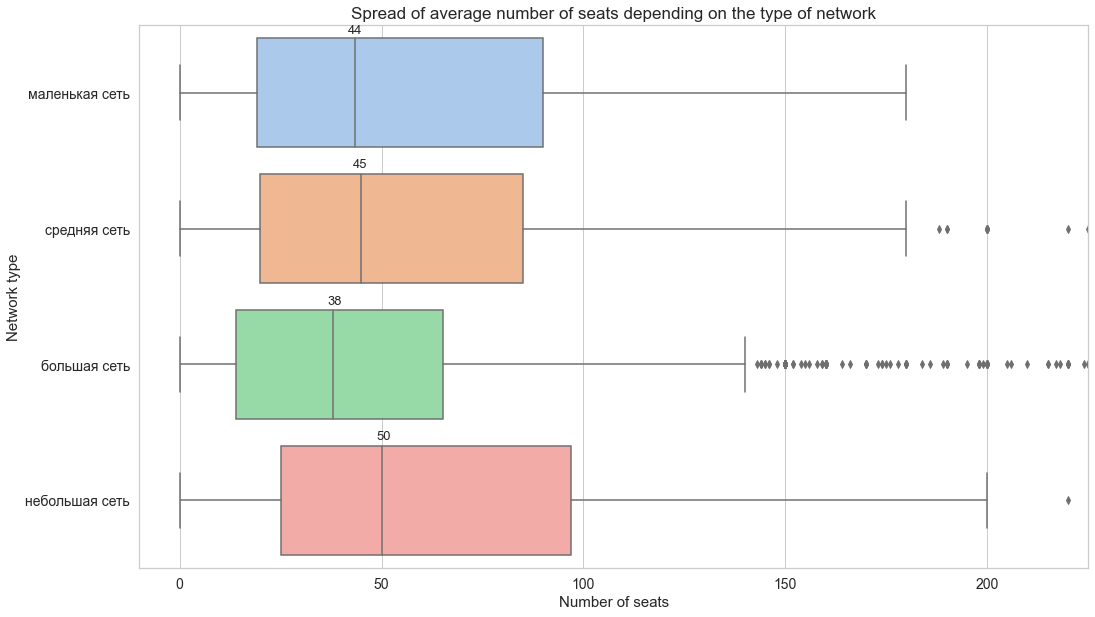

In [39]:
# boxplot charting
sns.set_theme(style='whitegrid')
plt.figure(figsize=(17,10))
plots = sns.boxplot(x='number_of_seats', y='chain_category', 
                    data=rest_data_chains_only.loc[rest_data_chains_only['number'] != 1], palette='pastel')
plots.set_xlim(-10,225)
# adding annotations to a chart
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) & 
                              (rest_data_chains_only['chain_category'] == 'маленькая сеть'), 
                              'number_of_seats'], 50)), xy=(348, 584), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) &
                              (rest_data_chains_only['chain_category'] == 'средняя сеть'), 
                              'number_of_seats'], 50)), xy=(353, 450), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) &
                              (rest_data_chains_only['chain_category'] == 'большая сеть'), 
                              'number_of_seats'], 50)), xy=(327, 313), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) &
                              (rest_data_chains_only['chain_category'] == 'небольшая сеть'), 
                              'number_of_seats'], 50)), xy=(376, 178), xycoords='figure points', fontsize=13)
plt.title('Spread of average number of seats depending on the type of network', fontsize=17)
plt.tick_params(labelsize=14)
plt.xlabel('Number of seats', fontsize=15)
plt.ylabel('Network type', fontsize=15)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'chain_category' column shows the network category of catering establishments in Russian
    
    * маленькая сеть - small network
    * небольшая сеть - moderate network
    * средняя сеть - medium network
    * большая сеть - large network
</div>

**Conclusions**

We found out that network establishments are characterized by many establishments with a small number of seats in each. More than 400 establishments have no seats at all, the median seating is 40, the average is 52. There are a number of network establishments (10% of the total) with a large number of seats, from 120 to 580.

But the main thing - if you take a **random network**, then there is a high probability of stumbling upon a **large network** (with more than 10 establishments) with a **small number of seats** (about 38).

### Determining the average number of seats in each type of establishment

Let's look at general information about the distribution of the number of places in each type of institution and build a boxplot diagram.

In [40]:
# output of general information about the distribution of the number of seats
df.groupby('object_type')['number_of_seats'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2584.0,130.337848,95.189104,0.0,51.5,103.0,200.0,1400.0
ресторан,2282.0,96.884750,94.781446,0.0,46.0,80.0,114.0,1500.0
бар,855.0,43.533333,67.112342,0.0,20.0,35.0,50.0,1700.0
буфет,577.0,51.509532,56.499972,0.0,15.0,32.0,80.0,320.0
кафе,6071.0,39.785703,37.751163,0.0,15.0,30.0,50.0,533.0
кафетерий,395.0,9.184810,14.677023,0.0,0.0,6.0,12.0,200.0
фаст-фуд,1898.0,20.808219,38.552842,0.0,0.0,6.0,25.0,580.0
закусочная,349.0,7.825215,16.865453,0.0,0.0,0.0,10.0,216.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

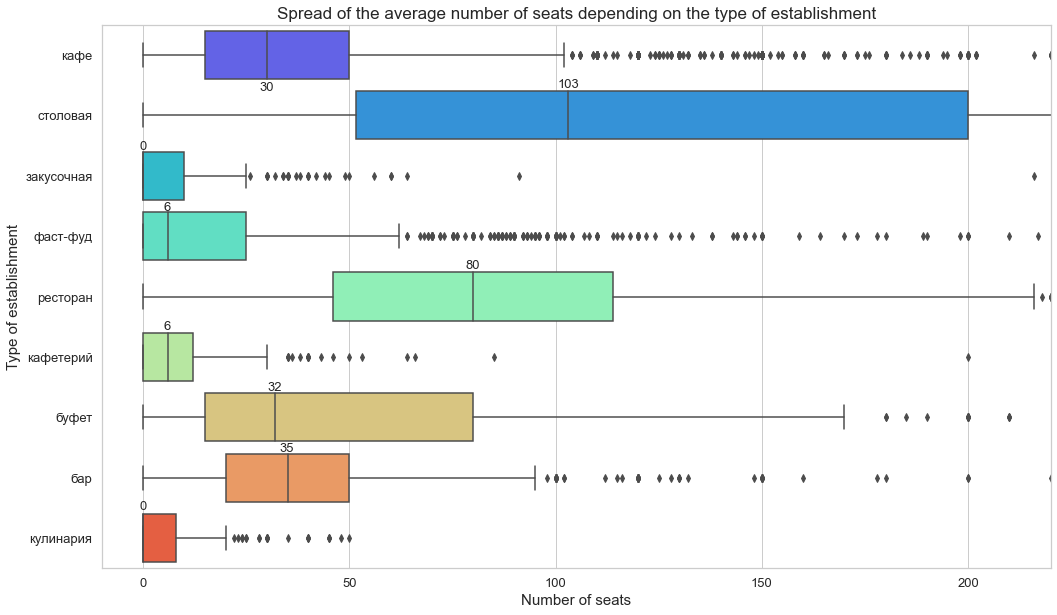

In [41]:
# boxplot charting
sns.set_theme(style='whitegrid')
plt.figure(figsize=(17,10))
plots = sns.boxplot(x='number_of_seats', y='object_type', data=df, palette='rainbow')
plots.set_xlim(-10,220)
# adding annotations to a chart
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'кулинария', 'number_of_seats'], 50)), 
               xy=(140, 106), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'бар', 'number_of_seats'], 50)), 
               xy=(279, 164), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'буфет', 'number_of_seats'], 50)), 
               xy=(267, 225), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'кафетерий', 'number_of_seats'], 50)), 
               xy=(163, 286), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'ресторан', 'number_of_seats'], 50)), 
               xy=(465, 347), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'фаст-фуд', 'number_of_seats'], 50)), 
               xy=(163, 405), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'закусочная', 'number_of_seats'], 50)), 
               xy=(140, 466), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'столовая', 'number_of_seats'], 50)), 
               xy=(558, 528), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'кафе', 'number_of_seats'], 50)), 
               xy=(259, 525), xycoords='figure points', fontsize=13)
plt.title('Spread of the average number of seats depending on the type of establishment', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Number of seats', fontsize=15)
plt.ylabel('Type of establishment', fontsize=15)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_type' column shows the type of catering establishments in Russian
    
    * кафе - cafe
    * столовая - canteen
    * ресторан - restaurant
    * фаст-фуд - fast food
    * бар - bar
    * буфет - buffet
    * кафетерий - cafeteria
    * закусочная - diner
    * кулинария - culinary
</div>

**Conclusions**

* Canteens, restaurants and bars are characterized by a large number of seats. There are outliers in the big direction;
* According to the average number of seats, the top 3 is the same: canteens - 103 seats, restaurants - 80 seats and bars - 35 seats;
* For fast food, diners and culinaries, a small number of places is typical, which is logical.

### Determination of the top 10 streets by the number of catering facilities

Let's try to highlight the names of the streets in two ways:

**The first way.** Let's separate the information about the street from the `address` column into a separate column. The algorithm of actions will be as follows: we will create an empty list where, using a loop, we will add only streets to find the place of the street name in the address. If Moscow is present in the phrase, then the beginning of the search place will be the expression `город Москва` (city of Moscow), the end of the search place will be `дом` (house) or `владение` (possession). If Moscow is not registered in the address, then we will use only the search at the end of the phrase (`дом` (house) or `владение` (possession)).

In [42]:
for street in df['address'].unique():  
    if 'Москва' in street:
        if 'владение' in street:
            start = street.find('город Москва')
            end = street.find('владение')
            df.loc[df['address'] == street, 'street_name'] = street[start+14:end-2]
        else:
            start = street.find('город Москва')
            end = street.find('дом')
            df.loc[df['address'] == street, 'street_name'] = street[start+14:end-2]
    else:
        if 'владение' in street:
            end = street.find('владение')
            df.loc[df['address'] == street, 'street_name'] = street[:end-2]
        else:
            end = street.find('дом')
            df.loc[df['address'] == street, 'street_name'] = street[:end-2]

**Second way.** Let's write a regular expression that will extract from the address only information about streets/avenues/highways/lanes/drives/embankments/boulevards according to the following method: information located after the phrase **город Москва,** (city of Moscow,) and before the phrase **дом** (house) or **владение** (possession) will be written to the new `street_name` column.

In [43]:
# formation of a column with the name of the streets
df['street_name'] = df['address'].str.extract('город Москва,\s([\w\s\S-]+),\s(?:дом|владение)')

# check
df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'chain' column shows belonging to the public catering network in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
    The 'street_name' column shows the catering establishments street name in Russian
</div>

Let's check the number of missing values.

In [44]:
# checking for missing values
df['street_name'].isna().sum()

211

In the missing values, using the loop, write down the information located before the phrase **дом** (house) or **владение** (possession). So we will exclude the spelling of addresses that do not contain the phrase **город Москва** (city of Moscow) at the beginning.

In [45]:
for value in df.loc[df['street_name'].isna(), 'address'].unique():
    street = df.loc[df['address'] == value, 'address'].str.extract('([\w\s\S-]+),\s(?:дом|владение)', expand=False)
    df.loc[df['address'] == value, 'street_name'] = street

In the remaining missing values, using the loop, write down the information located after the phrase **город Москва** (city of Moscow), and before the phrase **строение** (building). This will eliminate the spelling of addresses that do not contain the phrase **дом** (house) or **владение** (possession) at the end.

In [46]:
for value in df.loc[df['street_name'].isna(), 'address'].unique():
    street = df.loc[df['address'] == value, 'address'].str.extract('город Москва,\s([\w\s\S-]+),\sстроение', expand=False)
    df.loc[df['address'] == value, 'street_name'] = street

Finally, in the last missing values, using the loop, we write down the information located after the phrase **город Москва** (city of Moscow). Thus, we have covered all possible spellings of the address. For example, in the city of Zelenograd there are no streets, there are buildings with numbers, for correct identification, instead of a street, it is more logical to use the full record of the format "city of Zelenograd, building XXX".

In [47]:
for value in df.loc[df['street_name'].isna(), 'address'].unique():
    street = df.loc[df['address'] == value, 'address'].str.extract('город Москва,\s([\w\s\S-]+)', expand=False)
    df.loc[df['address'] == value, 'street_name'] = street

Let's check the number of missing values.

In [48]:
# checking for missing values
df['street_name'].isna().sum()

0

In [49]:
# check
df.head(20)

,id,object_name,chain,object_type,address,number_of_seats,street_name
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,стол. при гоу сош № 1051,несетевое,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,Абрамцевская улица
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,буфет мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,Авиамоторная улица
8,20958,кпф семья-1,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,Авиамоторная улица
9,28858,столовая мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,Авиамоторная улица


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'chain' column shows belonging to the public catering network in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
    The 'street_name' column shows the catering establishments street name in Russian
</div>

We will form a pivot table with the distribution of the number of catering facilities by streets, select the top 10 and build a bar chart.

In [50]:
# formation of a pivot table
rest_by_streets = (
    df
    .pivot_table(index='street_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)
rest_by_streets = rest_by_streets[:10]
rest_by_streets

,number
street_name,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,172
Пресненская набережная,167
Варшавское шоссе,162
Ленинский проспект,148
проспект Вернадского,128
Кутузовский проспект,114
Каширское шоссе,111


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'street_name' column shows the catering establishments street name in Russian
    
    * проспект Мира	- Mira avenue
    * Профсоюзная улица - Profsoyuznaya street
    * Ленинградский проспект - Leningrad avenue
    * Пресненская набережная - Presnenskaya embankment
    * Варшавское шоссе - Warsaw highway
    * Ленинский проспект - Leninsky avenue
    * проспект Вернадского - Vernadsky avenue
    * Кутузовский проспект - Kutuzovsky avenue
    * Каширское шоссе - Kashirskoe highway
    * Кировоградская улица - Kirovogradskaya street
</div>

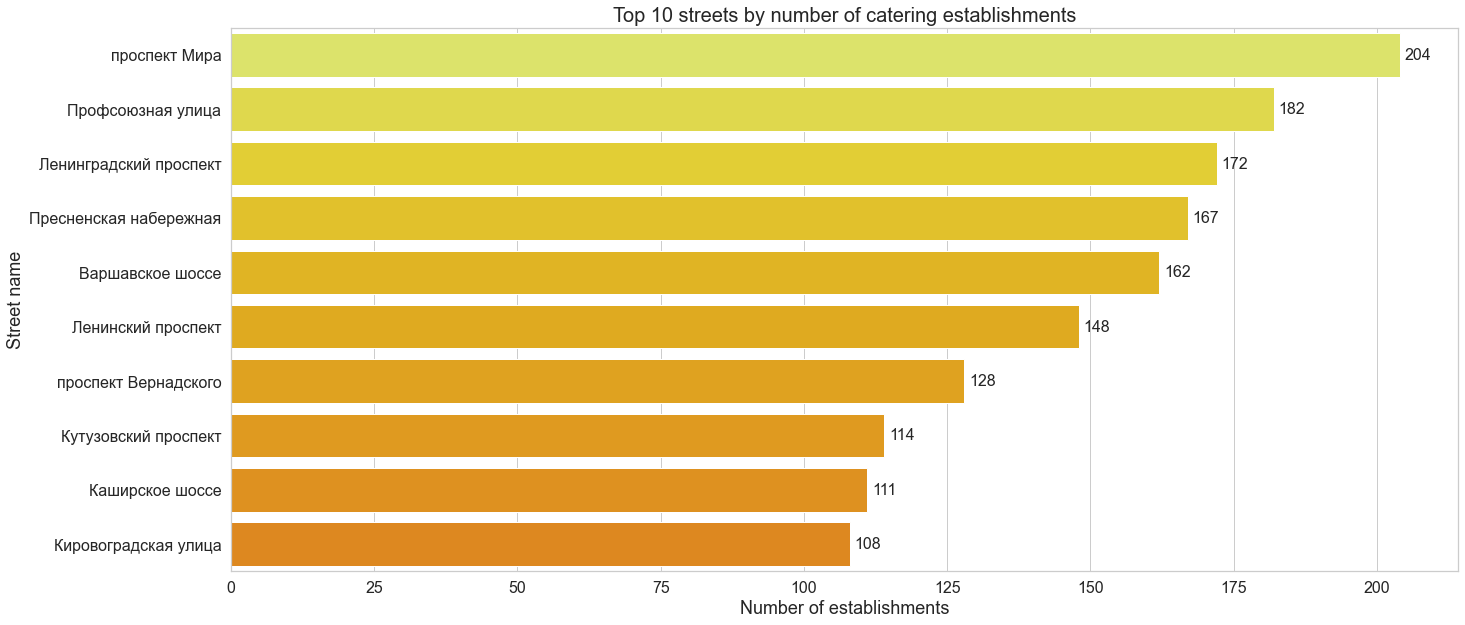

In [51]:
# building a bar chart
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x='number', y=rest_by_streets.index, data=rest_by_streets, palette='Wistia')
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_x() + bar.get_width(),
                   bar.get_y() + bar.get_height() / 2), ha='center', va='center',
                   size=16, xytext=(18, 0),
                   textcoords='offset points')
plt.title('Top 10 streets by number of catering establishments', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Number of establishments', fontsize=18)
plt.ylabel('Street name', fontsize=18)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'street_name' column shows the catering establishments street name in Russian
    
    * проспект Мира	- Mira avenue
    * Профсоюзная улица - Profsoyuznaya street
    * Ленинградский проспект - Leningrad avenue
    * Пресненская набережная - Presnenskaya embankment
    * Варшавское шоссе - Warsaw highway
    * Ленинский проспект - Leninsky avenue
    * проспект Вернадского - Vernadsky avenue
    * Кутузовский проспект - Kutuzovsky avenue
    * Каширское шоссе - Kashirskoe highway
    * Кировоградская улица - Kirovogradskaya street
</div>

Let's form an auxiliary table with information on the objects located on the top 10 streets to determine the districts of the city.

In [52]:
# write the street names in a separate list
top_10_streets = rest_by_streets.index.to_list()

# we will make a selection by matching the names in the list
top_10_streets_df = df.loc[df['street_name'].isin(top_10_streets)]

# check
top_10_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name
151,155973,андерсон,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,subway,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,несетевое,фаст-фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'chain' column shows belonging to the public catering network in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
    The 'street_name' column shows the catering establishments street name in Russian
</div>

To determine the areas where objects from the top 10 streets are located, we will use the free Dadata API. To begin with, we will form a list of addresses for which we will make a request using a loop in order to obtain complete information about the address. Further, from the response to the request, we select only the names of the districts, form a new list and write it to the new column `district_name` of the dataframe.

The Yandex Maps Geocoder API was not used due to usage restrictions. According to the conditions, the results of geocoding cannot be saved and used without a map, the results must be displayed on a public map.

In [53]:
# using the Dadata API
from dadata import Dadata
token = "................................."
secret = ".................................."
dadata = Dadata(token, secret)

# creating a list with addresses from the top 10 streets
top_10_streets_addresses = top_10_streets_df['address'].to_list()

# creating an empty list with district names
top_10_streets_districts = []

# a cycle with a request for complete information on addresses from the top 10 list
for value in top_10_streets_addresses:
    result = dadata.clean(name="address", source=value)
    top_10_streets_districts.append(result.get('city_district'))
    
# adding a column with district names to the dataframe
top_10_streets_df['district_name'] =  top_10_streets_districts

In [54]:
# check
top_10_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name,district_name
0,155973,андерсон,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Донской
1,23618,subway,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,Донской
2,155852,кафе «ламаджо»,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,Донской
3,152556,шаурма в пите,несетевое,фаст-фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,Нагорный
4,120658,выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,Нагорный


Let's form a pivot table with the distribution of the number of catering facilities by districts from the top 10 streets and build a bar chart.

In [55]:
# formation of a pivot table
rest_by_districts = (
    top_10_streets_df
    .pivot_table(index='district_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

rest_by_districts

,number
district_name,
Пресненский,167
Чертаново Центральное,88
Тропарево-Никулино,87
Аэропорт,65
Мещанский,63
Обручевский,63
Свиблово,62
Дорогомилово,61
Нагатино-Садовники,57


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'district_name' column shows the catering establishments Moscow district name in Russian
    
    * Пресненский - Presnensky
    * Чертаново Центральное - Chertanovo Central
    * Тропарево-Никулино - Troparevo-Nikulino
    * Аэропорт - Airport
    * Мещанский - Meshchansky
    * Обручевский - Obruchevsky
    * Свиблово - Sviblovo
    * Дорогомилово - Dorogomilovo
    * Нагатино-Садовники - Nagatino-Sadovniki
    * Фили-Давыдково - Fili-Davydkovo
    * Алексеевский - Alekseevsky
    * Беговой - Begovoy
    * Чертаново Южное - Chertanovo South
    * Донской - Donskoy
    * Нагорный - Nagorny
    * Чертаново Северное - Chertanovo North
    * Теплый Стан - Teply Stan
    * Москворечье-Сабурово - Moskvorechye-Saburovo
    * Гагаринский - Gagarinsky
    * Черемушки - Cheryomushki
    * Коньково - Konkovo
    * Хорошевский - Khoroshevsky
    * Раменки - Ramenki
    * Академический - Akademichesky
    * Ломоносовский	- Lomonosovsky
    * Сокол - Sokol
    * Якиманка - Yakimanka
    * Останкинский - Ostankinsky
    * Проспект Вернадского - Prospekt Varnadskogo
    * Орехово-Борисово Северное - Orekhovo-Borisovo North
    * Ясенево - Yasenevo
    * Ростокино - Rostokino
    * Орехово-Борисово Южное - Orekhovo-Borisovo South
    * Новомосковский - Novomoskovsky
    * Южное Бутово - South Butovo
    * Ярославский - Yaroslavsky
    
</div>

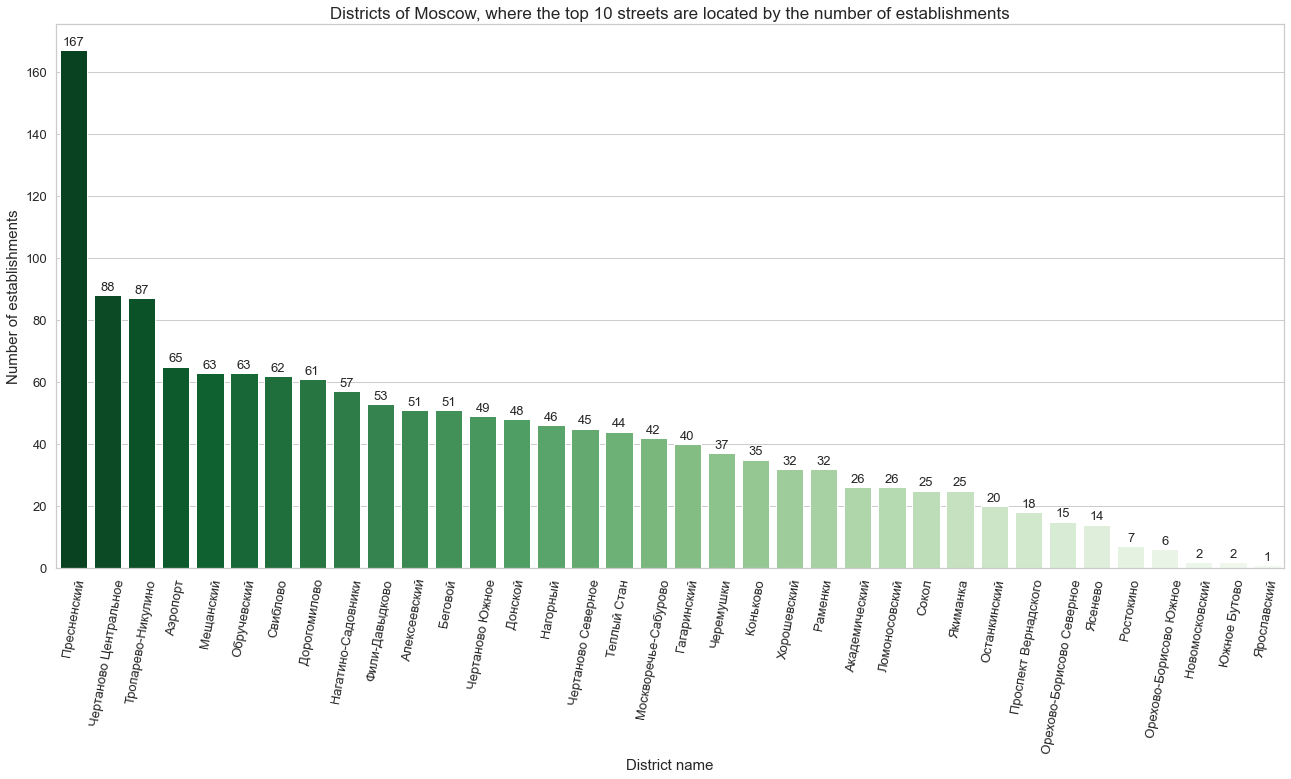

In [56]:
# building a bar chart
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x=rest_by_districts.index, y='number', data=rest_by_districts, palette='Greens_r')
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Districts of Moscow, where the top 10 streets are located by the number of establishments', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('District name', fontsize=15)
plt.xticks(rotation=80)
plt.ylabel('Number of establishments', fontsize=15)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'district_name' column shows the catering establishments Moscow district name in Russian
    
    * Пресненский - Presnensky
    * Чертаново Центральное - Chertanovo Central
    * Тропарево-Никулино - Troparevo-Nikulino
    * Аэропорт - Airport
    * Мещанский - Meshchansky
    * Обручевский - Obruchevsky
    * Свиблово - Sviblovo
    * Дорогомилово - Dorogomilovo
    * Нагатино-Садовники - Nagatino-Sadovniki
    * Фили-Давыдково - Fili-Davydkovo
    * Алексеевский - Alekseevsky
    * Беговой - Begovoy
    * Чертаново Южное - Chertanovo South
    * Донской - Donskoy
    * Нагорный - Nagorny
    * Чертаново Северное - Chertanovo North
    * Теплый Стан - Teply Stan
    * Москворечье-Сабурово - Moskvorechye-Saburovo
    * Гагаринский - Gagarinsky
    * Черемушки - Cheryomushki
    * Коньково - Konkovo
    * Хорошевский - Khoroshevsky
    * Раменки - Ramenki
    * Академический - Akademichesky
    * Ломоносовский	- Lomonosovsky
    * Сокол - Sokol
    * Якиманка - Yakimanka
    * Останкинский - Ostankinsky
    * Проспект Вернадского - Prospekt Varnadskogo
    * Орехово-Борисово Северное - Orekhovo-Borisovo North
    * Ясенево - Yasenevo
    * Ростокино - Rostokino
    * Орехово-Борисово Южное - Orekhovo-Borisovo South
    * Новомосковский - Novomoskovsky
    * Южное Бутово - South Butovo
    * Ярославский - Yaroslavsky
    
</div>

**Conclusions**

We have identified the top 10 streets by the number of objects. As expected, they turned out to be large outbound highways with a large number of houses: Mira Avenue, Profsoyuznaya Street, Leningradsky Avenue, Presnenskaya Embankment, Varshavskoye Highway, Leninsky Avenue, Vernadsky Avenue, Kutuzovsky Avenue, Kashirskoye Highway and Kirovogradskaya Street. In regions, Presnensky is leading by a wide margin. The rest of the top 10 districts by the number of objects: Chertanovo Central, Troparevo-Nikulino, Airport, Meshchansky, Obruchevsky, Sviblovo, Dorogomilovo, Nagatino-Sadovniki and Fili-Davydkovo. It can be seen that food facilities are common both in the city center and in residential areas.

### Determining the number of streets with one catering establishment

We will form a pivot table with the distribution of the number of catering establishments by streets, select the streets where only one establishment is located.

In [57]:
# formation of a pivot table
one_rest_by_street = (
    df
    .pivot_table(index='street_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)
one_rest_by_street = one_rest_by_street.loc[one_rest_by_street['number'] == 1]
one_rest_by_street.head()

,number
street_name,
14-я Парковая улица,1
Верхняя улица,1
12-й проезд Марьиной Рощи,1
Большой Кисельный переулок,1
2-й Балтийский переулок,1


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'street_name' column shows the catering establishments street name in Russian
    
    * 14-я Парковая улица - 14th Parkovaya street
    * Верхняя улица - Verkhnyya street
    * 12-й проезд Марьиной Рощи - 12th passage of Maryina Roshcha
    * Большой Кисельный переулок - Big Kiselny lane
    * 2-й Балтийский переулок - 2nd Baltiysky Lane
</div>

In [58]:
print('Number of streets with one catering establishment:', one_rest_by_street['number'].count())

Number of streets with one catering establishment: 721


Let's form an auxiliary table with information on the objects that are the only ones located on a particular street to determine the districts of the city.

In [59]:
# write the street names in a separate list
one_rest_streets = one_rest_by_street.index.to_list()

# we will make a selection by matching the names in the list
one_rest_streets_df = df.loc[df['street_name'].isin(one_rest_streets)]

# check
one_rest_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name
19,153644,американская лаборатория десертов,несетевое,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок
61,21214,столовая,несетевое,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица
69,22139,хуанхэ,несетевое,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок
81,25833,азербайджан,несетевое,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного
131,150881,вгик,несетевое,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'chain' column shows belonging to the public catering network in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
    The 'street_name' column shows the catering establishments street name in Russian
</div>

To determine the areas where there are objects that are the only ones located on a particular street, we will again use the free Dadata API. To begin with, we will form a list of addresses for which we will make a request using a loop in order to obtain complete information about the address. Further, from the response to the request, we select only the names of the districts, form a new list and write it to the new column `district_name` of the dataframe.

In [60]:
# creating a list with addresses from the top 10 streets
one_rest_streets_addresses = one_rest_streets_df['address'].to_list()

# creating an empty list with district names
one_rest_streets_districts = []

# a cycle with a request for complete information on addresses from the top 10 list
for value in one_rest_streets_addresses:
    result = dadata.clean(name="address", source=value)
    one_rest_streets_districts.append(result.get('city_district'))
    
# adding a column with district names to the dataframe
one_rest_streets_df['district_name'] =  one_rest_streets_districts

In [61]:
# check
one_rest_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name,district_name
0,153644,американская лаборатория десертов,несетевое,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок,Арбат
1,21214,столовая,несетевое,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица,Сокольники
2,22139,хуанхэ,несетевое,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,Аэропорт
3,25833,азербайджан,несетевое,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,Хорошёво-Мнёвники
4,150881,вгик,несетевое,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица,Ростокино


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'object_name' column shows the name of catering establishments in Russian
    The 'chain' column shows belonging to the public catering network in Russian
    The 'object_type' column shows the type of catering establishments in Russian
    The 'address' column shows the catering establishments address in Russian
    The 'street_name' column shows the catering establishments street name in Russian
</div>

Let's create a pivot table with the distribution of the number of catering facilities by districts from the list of streets where one establishment is located and build a bar chart.

In [62]:
# formation of a pivot table
one_rest_by_districts = (
    one_rest_streets_df
    .pivot_table(index='district_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

one_rest_by_districts

,number
district_name,
Таганский,28
Хамовники,26
Басманный,22
Пресненский,20
Тверской,20
Марьина Роща,16
Сокольники,15
Лефортово,13
Соколиная Гора,12


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'district_name' column shows the catering establishments Moscow district name in Russian
    
</div>

The list turned out to be impressive, leaving only the top 30.

In [63]:
one_rest_by_districts = one_rest_by_districts[:30]

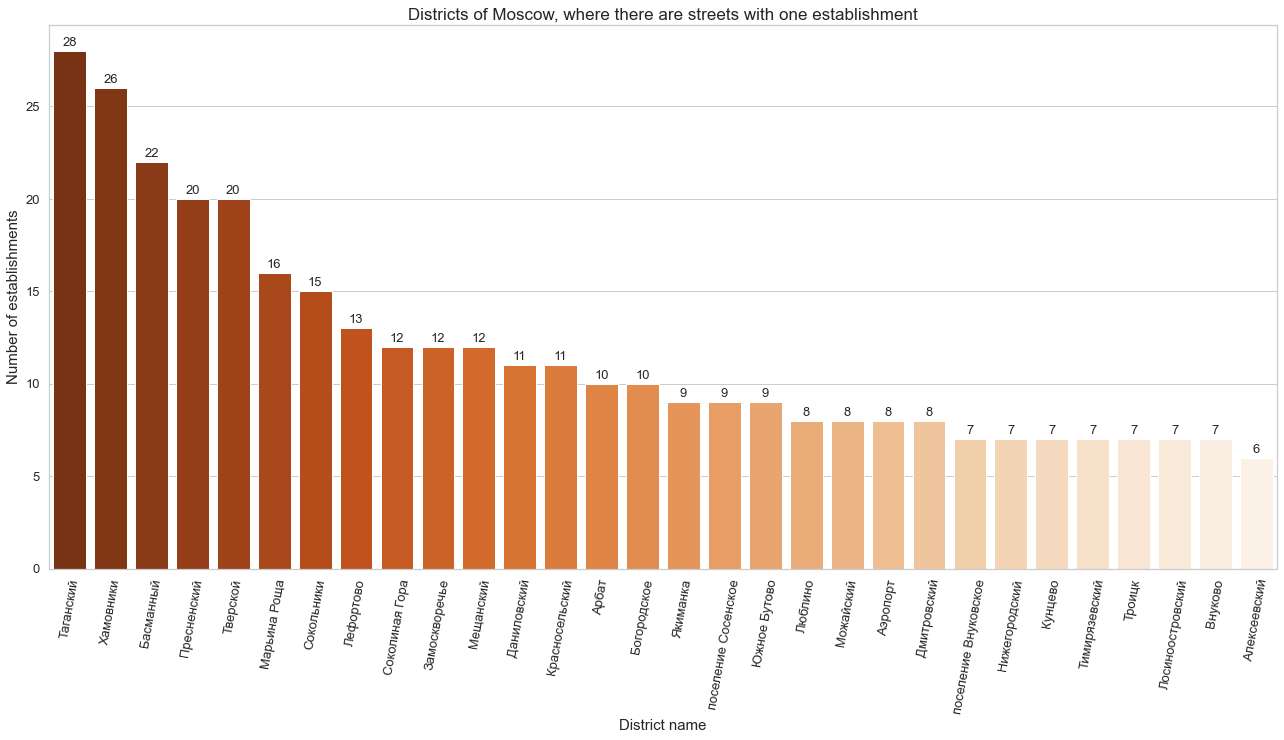

In [64]:
# building a bar chart
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x=one_rest_by_districts.index, y='number', data=one_rest_by_districts, palette='Oranges_r')
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Districts of Moscow, where there are streets with one establishment', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('District name', fontsize=15)
plt.xticks(rotation=80)
plt.ylabel('Number of establishments', fontsize=15)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'district_name' column shows the catering establishments Moscow district name in Russian
    
    * Таганский - Tagansky
    * Хамовники - Khamovniki
    * Басманный - Basmanny
    * Пресненский - Presnensky
    * Тверской - Tverskoy
    * Марьина Роща - Maryina Roshcha
    * Сокольники - Sokolniki
    * Лефортово - Lefortovo
    * Соколиная Гора - Sokolinaya Gora
    * Замоскворечье - Zamoskvorechye
    * Мещанский - Meshchansky
    * Даниловский - Danilovsky
    * Красносельский - Krasnoselsky
    * Арбат - Arbat
    * Богородское - Bogorodskoe
    * Якиманка - Yakimanka
    * поселение Сосенское - poselenie Sosenskoe
    * Южное Бутово - South Butovo
    * Люблино - Lyublino
    * Можайский - Mozhaiskiy
    * Аэропорт - Airport
    * Дмитровский - Dmitrovsky
    * поселение Внуковское - poselenie Vnukovskoe
    * Нижегородский - Nizhegorodskiy
    * Кунцево - Kuntsevo
    * Тимирязевский - Timiryazevskiy
    * Троицк - Troitsk
    * Лосиноостровский - Losinoostrovsky
    * Внуково - Vnukovo
    * Алексеевский - Alekseevsky
        
</div>

**Conclusions**

We determined that there is only one food establishment on 646 streets. Further, an analysis was made in which areas these streets are located. In terms of districts, the top 10 occupies the center and nearby areas: Tagansky, Khamovniki, Basmanny, Presnensky, Tverskoy, Maryina Roshcha, Sokolniki, Lefortovo, Sokolinaya Gora and Zamoskvorechye. This can be explained by the fact that the city center has many short streets and lanes with few houses.

## Presentation

Presentation: https://drive.google.com/file/d/1EjQhqQGgG5un4VRkSiqvxgE1J1TU9nob/view?usp=sharing

## General conclusions

As a result of the analysis of the public catering market in Moscow, we found out that:
* Moscow has the most cafes (40% of the total), canteens (17%) and restaurants (15%);
* Moscow has the most non-network establishments (81% of the total), network establishments only 19%;
* Network establishments are most common in fast food (41% of the number of establishments), culinary (29%) and restaurants (24%);
* Network establishments are characterized by many establishments with a small number of seats in each. Over 400 establishments have no seating at all, the most common seating value is 40;
* Top 3 in terms of average number of seats: canteens - 103 seats, restaurants - 80 seats and bars - 35 seats;
* If we take a random network, then there is a high probability to stumble upon a large network (with more than 10 establishments) with a small number of seats (about 38);
* Top 10 streets by number of establishments: Mira Avenue, Profsoyuznaya Street, Leningradsky Avenue, Presnenskaya Embankment, Varshavskoye Highway, Leninsky Avenue, Vernadsky Avenue, Kutuzovsky Avenue, Kashirskoye Highway and Kirovogradskaya Street;
* Top 10 districts by number of establishments: Presnensky, Chertanovo Central, Troparevo-Nikulino, Airport, Meshchansky, Obruchevsky, Sviblovo, Dorogomilovo, Nagatino-Sadovniki and Fili-Davydkovo;
* Top 10 districts with streets where only one establishment is located: Tagansky, Khamovniki, Basmanny, Presnensky, Tverskoy, Maryina Roshcha, Sokolniki, Lefortovo, Sokolinaya Gora and Zamoskvorechye.

Recommendations:
* Our robocafe should definitely be in the cafe format, as the most popular format;
* To begin with, the establishment must be made non-network. In the future, with successful development, it is recommended to switch to a network format;
* The number of seats is recommended to be in the range of 30-40 (average for cafes and for establishments in general);
* Location areas are recommended to be selected from the top 10 districts with streets where the largest number of establishments are located. These are popular places with the highest traffic.